In [1]:
import numpy as np
class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True,
                 eta0=0.001, epochs=1000, batch_size = 1, 
                 weight_decay=0.9, shuffle = True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0
        self._epochs = epochs

        self._cost_history = []

        self._coef = None
        self._intercept = None
        self._new_X = None
        self._w_history = None
        self._weight_decay = weight_decay
        self._batch_size = batch_size
        self._is_SGD = shuffle

    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):
        self._new_X = np.array(X)
        y = y.reshape(-1, 1)

        if self.fit_intercept:

            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                    (intercept_vector, self._new_X), axis=1)

        theta_init = np.random.normal(0, 1, self._new_X.shape[1])         
        # weight값 초기화
        self._w_history = [theta_init]
        self._cost_history = [self.cost(
                        self.hypothesis_function(self._new_X, theta_init), y)]

        theta = theta_init

        for epoch in range(self._epochs):
            X_copy = np.copy(self._new_X)

            if self._is_SGD:
                np.random.shuffle(X_copy)

            batch = len(X_copy) // self._batch_size 


            for batch_count  in range(batch):
                X_batch = np.copy(
                            X_copy[batch_count * self._batch_size : (batch_count+1) & self._batch_size])

                gradient = self.gradient(X_batch  , y, theta).flatten()
                theta = theta - self._eta0 * gradient

            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay

        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta
    def cost(self, h, y):
        return 1/(2*len(y)) * np.sum((h-y).flatten() ** 2)

    def hypothesis_function(self, X, theta):
        return X.dot(theta).reshape(-1, 1)

    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):
        self._new_X = np.array(X)
        y = y.reshape(-1, 1)

        if self.fit_intercept:
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                    (intercept_vector, self._new_X), axis=1)

        theta_init = np.random.normal(0, 1, self._new_X.shape[1])
        self._w_history = [theta_init]
        self._cost_history = [self.cost(
                        self.hypothesis_function(self._new_X, theta_init), y)]

        theta = theta_init

        for epoch in range(self._epochs):
            gradient = self.gradient(self._new_X, y, theta).flatten()
            theta = theta - self._eta0 * gradient

            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay

        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta

    def predict(self, X):
        test_X = np.array(X)

        if self.fit_intercept:
            intercept_vector = np.ones([len(test_X), 1])
            test_X = np.concatenate(
                    (intercept_vector, test_X), axis=1)

            weights = np.concatenate(([self._intercept], self._coef), axis=0)
        else:
            weights = self._coef

        return test_X.dot(weights)

    @property
    def coef(self):
        return self._coef

    @property
    def intercept(self):
        return self._intercept

    @property
    def weights_history(self):
        return np.array(self._w_history)

    @property
    def cost_history(self):
        return self._cost_history

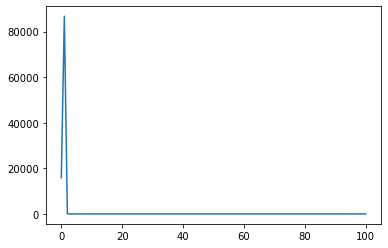

In [2]:
import pandas as pd
df =pd.read_csv('train.csv')
X=df['x'].values.reshape(-1,1)
Y=df['y'].values
gd_lr = LinearRegressionGD(batch_size=1,shuffle=False,eta0=0.001,epochs=10000) #eta0 학습률
gd_lr.fit(X,Y)
import matplotlib.pyplot as plt
plt.plot(range(len(gd_lr.cost_history)),gd_lr.cost_history)

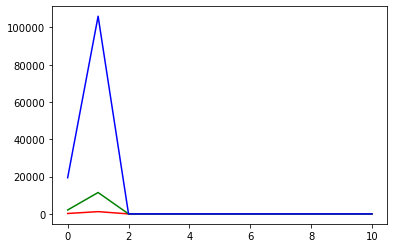

In [3]:
sgd_lr = LinearRegressionGD() #확률적배치
bgd_lr = LinearRegressionGD(batch_size=len(X),shuffle=False) #전체배치
msgd_lr = LinearRegressionGD(batch_size=200) #확률적미니배치
sgd_lr.fit(X,Y)
bgd_lr.fit(X,Y)
msgd_lr.fit(X,Y)
import matplotlib.pyplot as plt
plt.plot(range(len(sgd_lr.cost_history)),sgd_lr.cost_history,'r')
plt.plot(range(len(bgd_lr.cost_history)),bgd_lr.cost_history,'g')
plt.plot(range(len(msgd_lr.cost_history)),msgd_lr.cost_history,'b')